 # Set up

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('../data/processed_weather_data.csv', index_col='Formatted Date', parse_dates=True)

# Average Temperature Trends From 2006 to 2016

C:\Users\Admin\AppData\Local\Temp\ipykernel_32640\463636810.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_temp = df.resample('Y')['Temperature (C)'].mean()


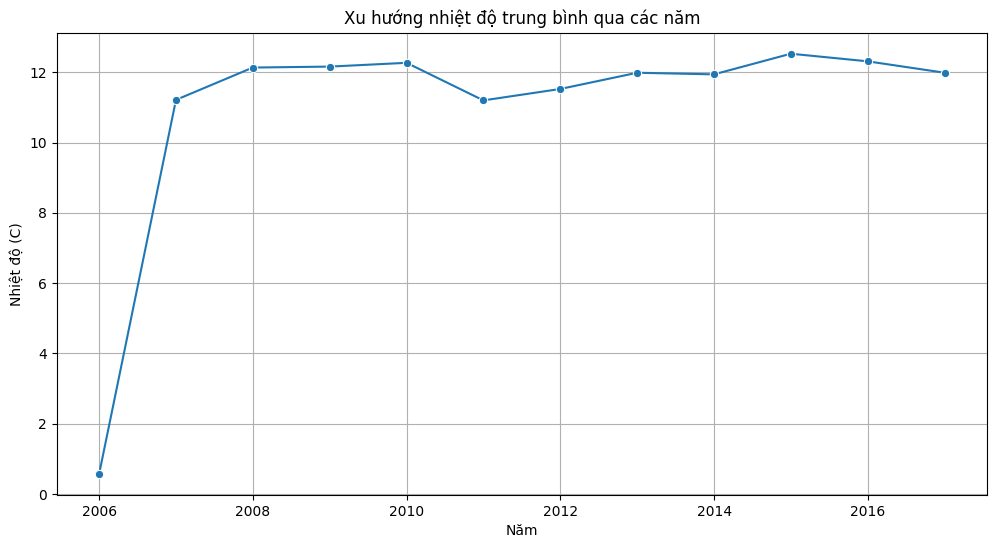

In [136]:
yearly_avg_temp = df.resample('Y')['Temperature (C)'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_temp, marker='o')
plt.title('Xu hướng nhiệt độ trung bình qua các năm')
plt.ylabel('Nhiệt độ (C)')
plt.xlabel('Năm')
plt.grid(True)
plt.savefig('../charts/yearly_temp_trend.png')

### Nhiệt độ và độ ẩm qua các năm

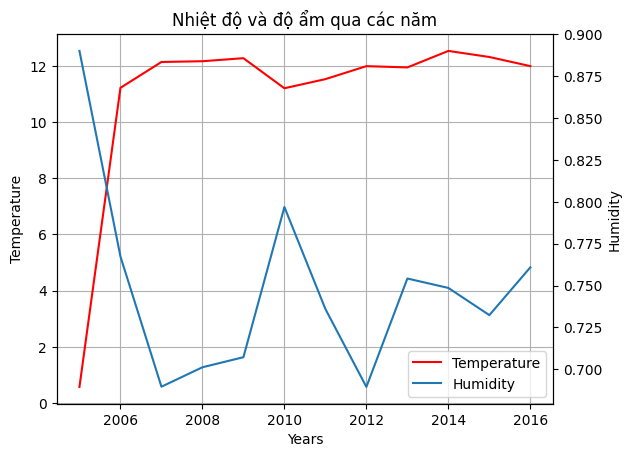

In [137]:
yearly_avg = df.groupby('Year')[['Temperature (C)', 'Humidity']].mean()

fig, ax1 = plt.subplots()
ax1.plot(yearly_avg.index, yearly_avg['Temperature (C)'], 'r', label = 'Temperature')
plt.title('Nhiệt độ và độ ẩm qua các năm')
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(yearly_avg.index, yearly_avg['Humidity'], label = 'Humidity')
ax2.set_ylabel('Humidity')

lines = ax1.get_lines() + ax2.get_lines()
labels = []
for line in lines:
    labels.append(line.get_label())
ax1.legend(lines, labels, loc = 'best')

plt.savefig('../charts/yearly_temp_and_humid.png')

### nhiệt độ và độ ẩm qua các tháng

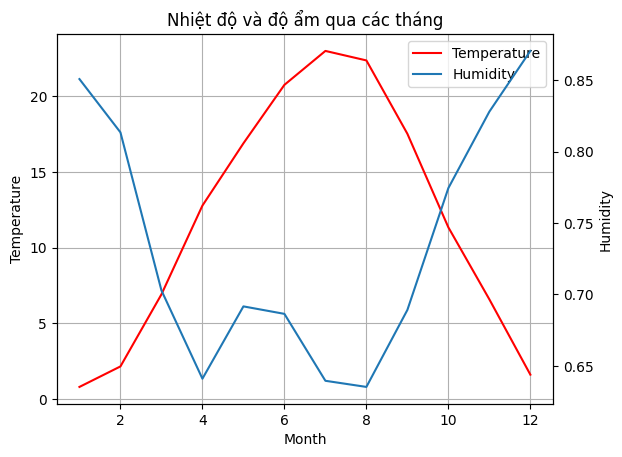

In [138]:
monthly_cycle = df.groupby('Month')[['Temperature (C)', 'Humidity']].mean()
fig, ax1 = plt.subplots()
ax1.plot(monthly_cycle.index, monthly_cycle['Temperature (C)'], 'r', label = 'Temperature')
plt.title('Nhiệt độ và độ ẩm qua các tháng')
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(monthly_cycle.index, monthly_cycle['Humidity'], label = 'Humidity')
ax2.set_ylabel('Humidity')

lines = ax1.get_lines() + ax2.get_lines()
labels = []
for line in lines:
    labels.append(line.get_label())
ax1.legend(lines, labels, loc = 'best')

plt.savefig('../charts/month_temp_and_humid.png')

### nhiệt độ và độ ẩm theo giờ


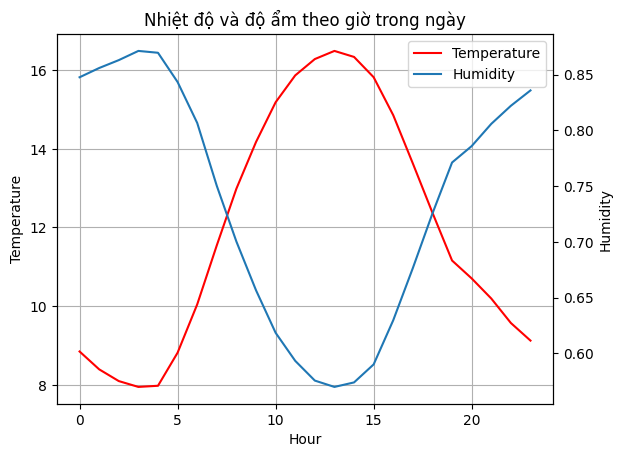

In [139]:
hourly_cycle = df.groupby('Hour')[['Temperature (C)', 'Humidity']].mean()
fig, ax1 = plt.subplots()
ax1.plot(hourly_cycle.index, hourly_cycle['Temperature (C)'], 'r', label = 'Temperature')
plt.title('Nhiệt độ và độ ẩm theo giờ trong ngày')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(hourly_cycle.index, hourly_cycle['Humidity'], label = 'Humidity')
ax2.set_ylabel('Humidity')

lines = ax1.get_lines() + ax2.get_lines()
labels = []
for line in lines:
    labels.append(line.get_label())
ax1.legend(lines, labels, loc = 'best')

plt.savefig('../charts/hour_temp_and_humid.png')

### wind avg year

C:\Users\Admin\AppData\Local\Temp\ipykernel_32640\3641494913.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Yearly_wind_speed = df[['Wind Speed (km/h)']].resample('Y').mean()


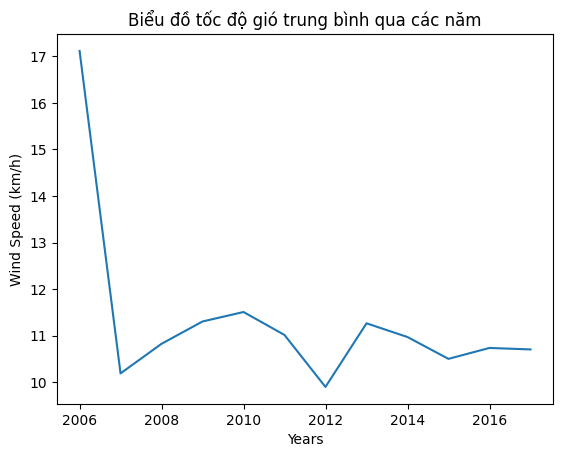

In [140]:
Yearly_wind_speed = df[['Wind Speed (km/h)']].resample('Y').mean()

plt.plot(Yearly_wind_speed.index, Yearly_wind_speed['Wind Speed (km/h)'])
plt.title('Biểu đồ tốc độ gió trung bình qua các năm')
plt.xlabel('Years')
plt.ylabel('Wind Speed (km/h)')

plt.savefig('../charts/yearly_wind_speed.png')

### sự chênh lệch giữa nhiệt độ thực tế và nhiệt độ cảm nhận

Text(0.5, 1.0, 'Biểu đồ thể hiện Temperature và Apparent Temperature qua các tháng')

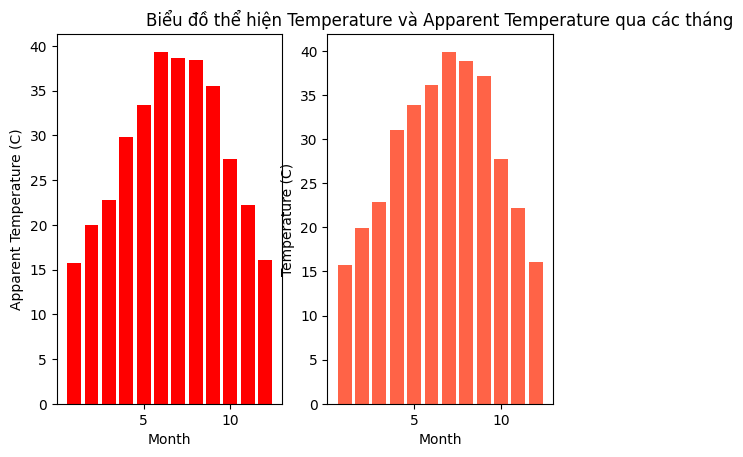

In [141]:
#cần sửa thêm
monthly_diff= df.groupby('Month')[['Apparent Temperature (C)', 'Temperature (C)']].max()
monthly_diff['Temp_Gap'] = monthly_diff['Apparent Temperature (C)'] - monthly_diff['Temperature (C)']
monthly_diff.groupby("Month")['Temp_Gap']

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows= 1)
ax1.bar(monthly_diff.index,monthly_diff['Apparent Temperature (C)'], color = 'red')
ax1.set_xlabel('Month')
ax1.set_ylabel('Apparent Temperature (C)')

ax2.bar(monthly_diff.index,monthly_diff['Temperature (C)'], color = 'tomato')
ax2.set_xlabel('Month')
ax2.set_ylabel('Temperature (C)')

plt.title('Biểu đồ thể hiện Temperature và Apparent Temperature qua các tháng')


<Axes: xlabel='Month', ylabel='Values'>

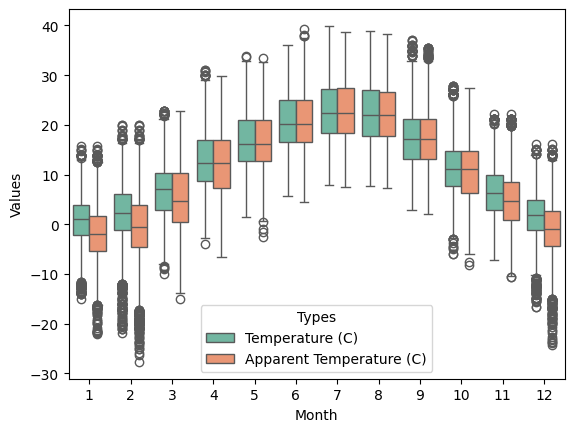

In [142]:
month_tempa = df.melt(id_vars = 'Month',value_vars=['Temperature (C)', 'Apparent Temperature (C)'], var_name= 'Types', value_name = 'Values' )
sns.boxplot(data = month_tempa,x='Month', y= 'Values', hue = 'Types', palette = 'Set2')

### Xu hướng thay đổi của Áp suất trung bình qua các năm là gì?

C:\Users\Admin\AppData\Local\Temp\ipykernel_32640\1278006410.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Yearly_pressure = df[['Pressure (millibars)']].resample('Y').mean()


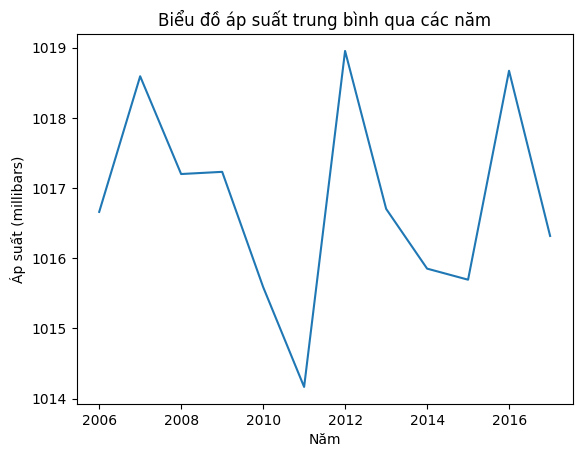

In [143]:
Yearly_pressure = df[['Pressure (millibars)']].resample('Y').mean() 
plt.plot(Yearly_pressure.index, Yearly_pressure['Pressure (millibars)']) 
plt.title('Biểu đồ áp suất trung bình qua các năm') 
plt.xlabel('Năm') 
plt.ylabel('Áp suất (millibars)') 
plt.show()


###  Độ nhìn trung bình (Visibility) đã thay đổi như thế nào qua các năm

C:\Users\Admin\AppData\Local\Temp\ipykernel_32640\3062407947.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Yearly_visibility = df[['Visibility (km)']].resample('Y').mean()


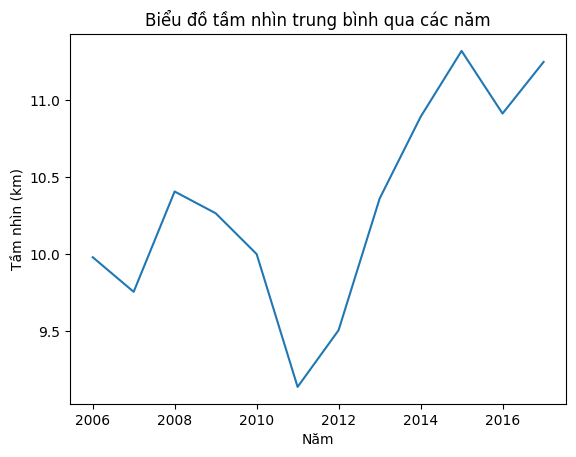

In [144]:
Yearly_visibility = df[['Visibility (km)']].resample('Y').mean() 
plt.plot(Yearly_visibility.index, Yearly_visibility['Visibility (km)']) 
plt.title('Biểu đồ tầm nhìn trung bình qua các năm') 
plt.xlabel('Năm') 
plt.ylabel('Tầm nhìn (km)') 
plt.show()
 

### Mẫu hình thay đổi tốc độ gió trung bình theo từng giờ trong ngày như thế nào?

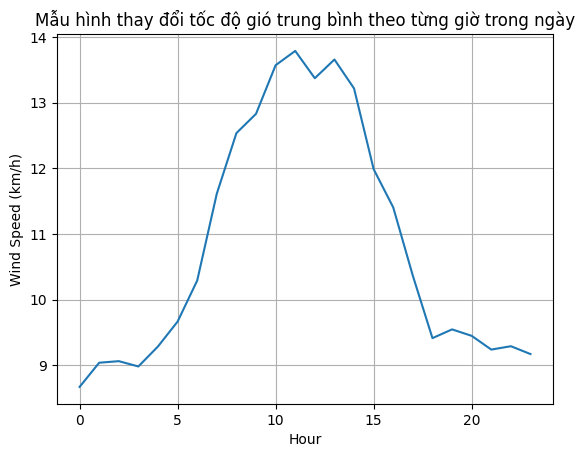

In [145]:
hourly_wind_speed = df.groupby('Hour')[['Wind Speed (km/h)']].mean()
plt.plot(hourly_wind_speed.index, hourly_wind_speed['Wind Speed (km/h)'])
plt.title('Mẫu hình thay đổi tốc độ gió trung bình theo từng giờ trong ngày')
plt.xlabel('Hour')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)
#plt.savefig('../charts/hourly_wind_speed.png') 

### Mẫu hình tầm nhìn trung bình theo từng giờ trong ngày như thế nào?

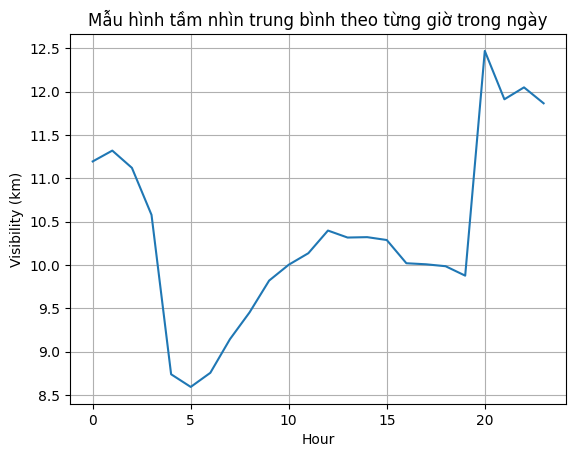

In [146]:
hourly_visibility = df.groupby('Hour')[['Visibility (km)']].mean()
plt.plot(hourly_visibility.index, hourly_visibility['Visibility (km)'])
plt.title('Mẫu hình tầm nhìn trung bình theo từng giờ trong ngày')
plt.xlabel('Hour')
plt.ylabel('Visibility (km)')
plt.grid(True)

### Mẫu hình thay đổi theo giờ trong ngày của độ chênh lệch giữa Nhiệt độ Cảm nhận (Apparent Temperature) và Nhiệt độ thực (Temperature) là gì?

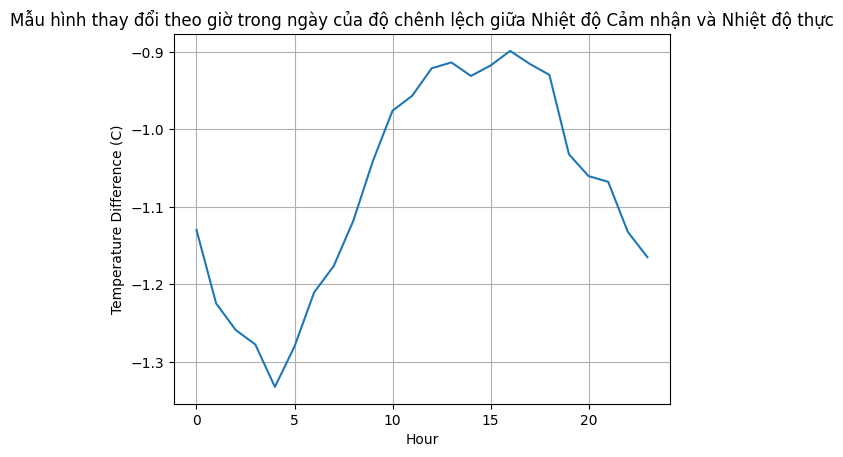

In [147]:
temp_dif = df.groupby('Hour')[['Apparent Temperature (C)','Temperature (C)']].mean()
temp_dif['temp diff'] = temp_dif['Apparent Temperature (C)'] - temp_dif['Temperature (C)']

plt.plot(temp_dif.index, temp_dif['temp diff'])
plt.title('Mẫu hình thay đổi theo giờ trong ngày của độ chênh lệch giữa Nhiệt độ Cảm nhận và Nhiệt độ thực')
plt.xlabel('Hour')
plt.ylabel('Temperature Difference (C)')
plt.grid(True)
plt.show()

### Mẫu hình áp suất trung bình theo từng tháng trong năm là gì?

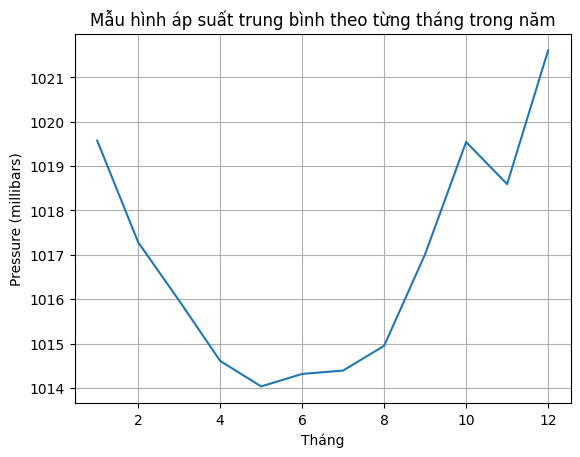

In [148]:
pressure_monthly = df.groupby('Month')[['Pressure (millibars)']].mean()

plt.plot(pressure_monthly.index, pressure_monthly['Pressure (millibars)'])
plt.title('Mẫu hình áp suất trung bình theo từng tháng trong năm')
plt.xlabel('Tháng')
plt.ylabel('Pressure (millibars)')    
plt.grid(True)
plt.show()


### Có sự khác biệt nào về nhiệt độ trung bình giữa các ngày trong tuần hay không?


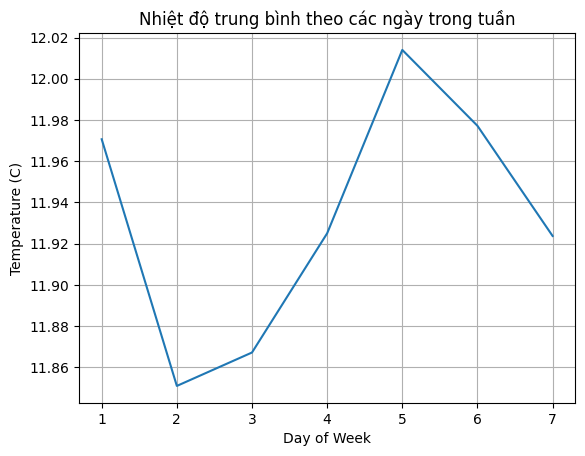

In [149]:
df['Day Of Week']= df['Weekday']+1
weekday_temp = df.groupby('Day Of Week')[['Temperature (C)']].mean()
    
plt.plot(weekday_temp.index, weekday_temp['Temperature (C)'])
plt.title('Nhiệt độ trung bình theo các ngày trong tuần')
plt.xlabel('Day of Week')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()

### Tần suất xuất hiện ‘Snow’ (trong cột Precip Type) thay đổi như thế nào theo các năm?


C:\Users\Admin\AppData\Local\Temp\ipykernel_32640\2994042714.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  snow_frequency = df[df['Precip Type'] == 'snow'].resample('Y').size()


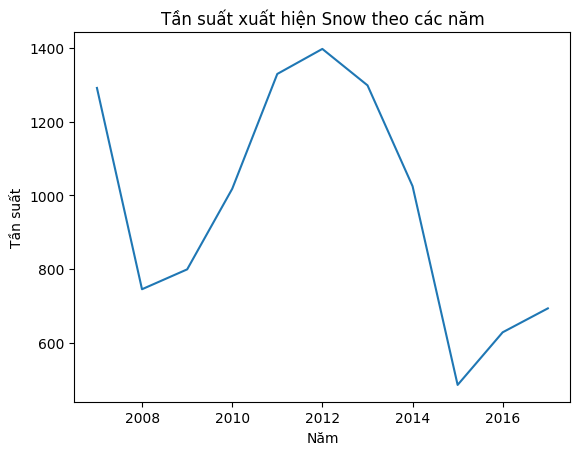

In [150]:
snow_frequency = df[df['Precip Type'] == 'snow'].resample('Y').size()

plt.plot(snow_frequency.index, snow_frequency)
plt.title('Tần suất xuất hiện Snow theo các năm')
plt.xlabel('Năm')
plt.ylabel('Tần suất')
plt.show()

### Độ thay đổi biên độ nhiệt độ hằng ngày (Nhiệt độ cao nhất – Nhiệt độ thấp nhất) giữa các tháng là như thế nào?

C:\Users\Admin\AppData\Local\Temp\ipykernel_32640\2941745205.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp_range = daily_temp_range[['Temp_Range']].resample('M').mean()


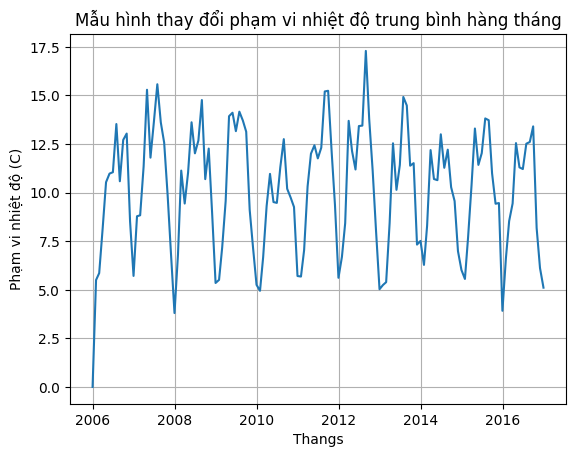

In [151]:
daily_temp_range = df.resample('D')[['Temperature (C)']].agg(['max', 'min'])
daily_temp_range['Temp_Range'] = daily_temp_range['Temperature (C)']['max'] - daily_temp_range['Temperature (C)']['min']
monthly_temp_range = daily_temp_range[['Temp_Range']].resample('M').mean()

plt.plot(monthly_temp_range.index, monthly_temp_range['Temp_Range'])
plt.title('Mẫu hình thay đổi phạm vi nhiệt độ trung bình hàng tháng')
plt.xlabel('Thangs')
plt.ylabel('Phạm vi nhiệt độ (C)')
plt.grid(True)
plt.show()



# Weather pattern relation matrix

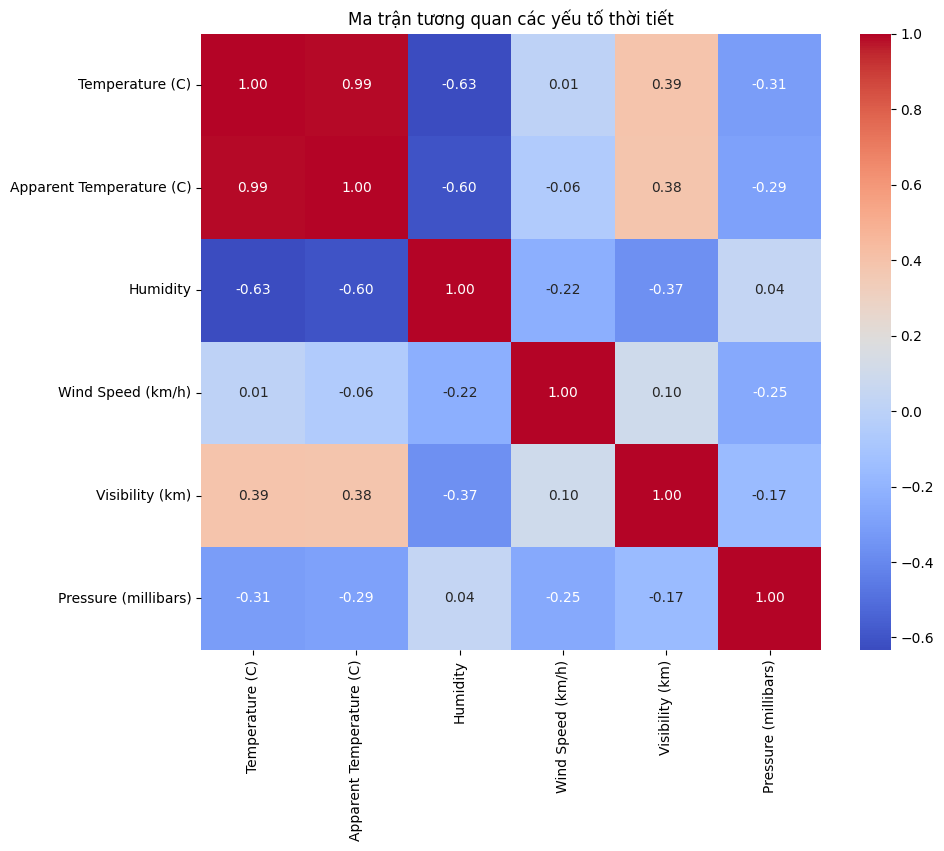

In [152]:
numeric_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan các yếu tố thời tiết')
plt.savefig('../charts/correlation_heatmap.png')

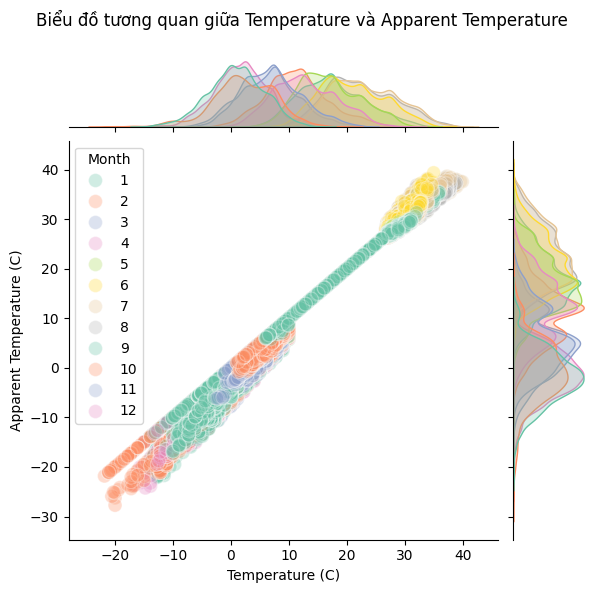

In [153]:
# How strong is the correlation between Temperature and Apparent Temperature?
a = sns.jointplot(data = df, x = 'Temperature (C)', y = 'Apparent Temperature (C)', hue = 'Month', alpha = 0.3, s =100, palette = 'Set2')
a.fig.suptitle("Biểu đồ tương quan giữa Temperature và Apparent Temperature")
a.fig.subplots_adjust(top=0.9)
plt.savefig('../charts/corr_tem_tempa.png')

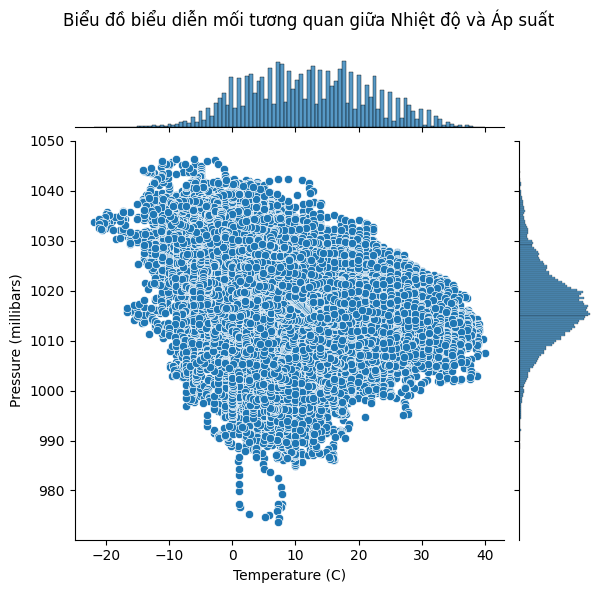

In [154]:
df_plot = df.reset_index(drop=True)
b= sns.jointplot(data=df_plot, x='Temperature (C)', y='Pressure (millibars)')
b.fig.suptitle('Biểu đồ biểu diễn mối tương quan giữa Nhiệt độ và Áp suất')
b.fig.subplots_adjust(top = 0.9)
plt.savefig('../charts/corr_tem_press.png')

# What is the correlation between Temperature and Visibility?

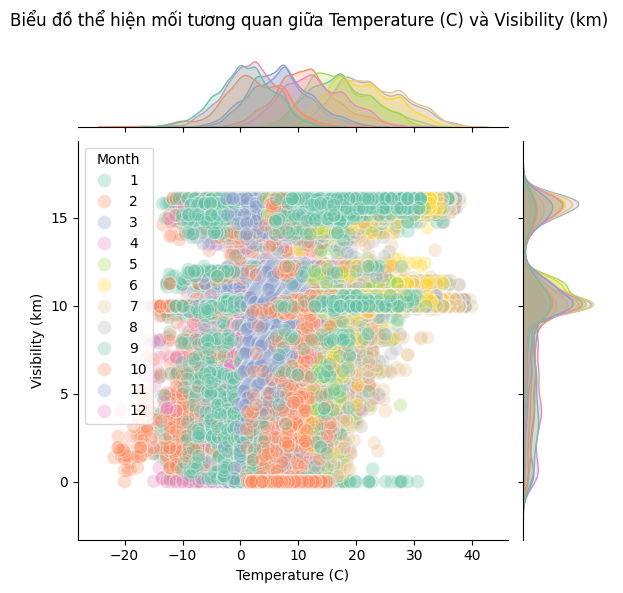

In [155]:
c = sns.jointplot(data = df, x = 'Temperature (C)', y = 'Visibility (km)', hue = 'Month', alpha = 0.3, s =100, palette = 'Set2')
c.fig.suptitle("Biểu đồ thể hiện mối tương quan giữa Temperature (C) và Visibility (km) ")
c.fig.subplots_adjust(top = 0.9)
plt.savefig('../charts/corr_tem_vi.png')

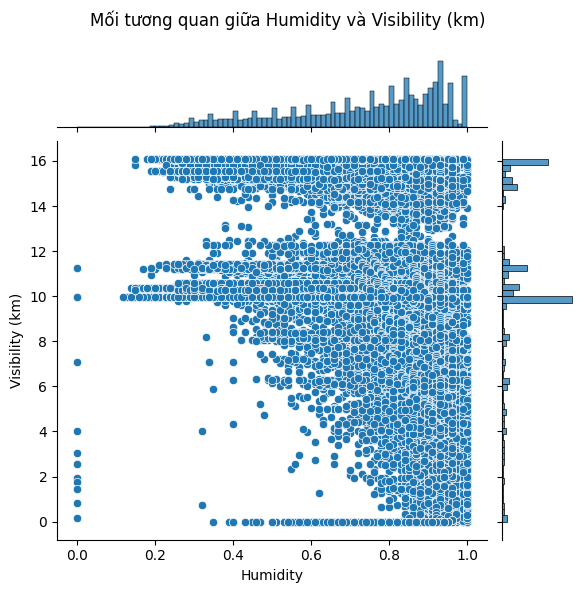

In [156]:
#  What is the correlation between Humidity and Visibility? (Does high humidity reduce visibility?)
d = sns.jointplot(data = df, x = 'Humidity', y = 'Visibility (km)')
d.fig.suptitle("Mối tương quan giữa Humidity và Visibility (km) ")
d.fig.subplots_adjust(top = 0.9)
plt.savefig('../charts/corr_hud_vi.png')

# What is the correlation between Humidity and Pressure?

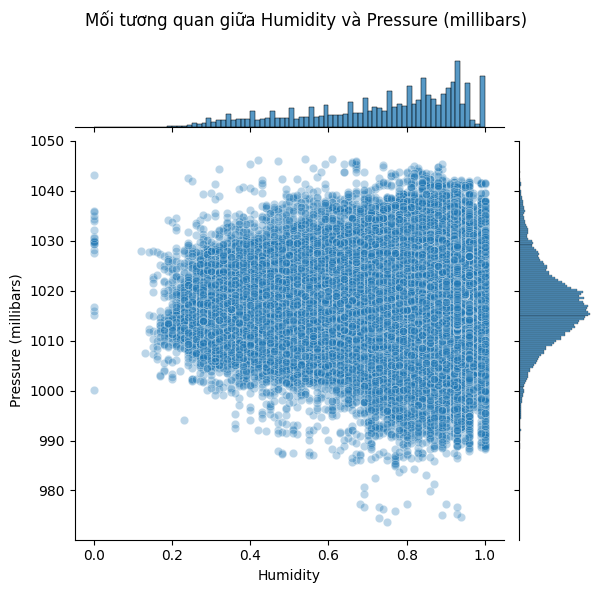

In [157]:
df_plot = df.reset_index(drop=True)

e = sns.jointplot(data=df_plot, x='Humidity', y='Pressure (millibars)', alpha=0.3)
e.fig.suptitle("Mối tương quan giữa Humidity và Pressure (millibars) ")
e.fig.subplots_adjust(top = 0.9)
plt.savefig('../charts/corr_hud_press.png')

# What is the correlation between Wind Speed and Pressure? (Does low pressure mean high winds?)

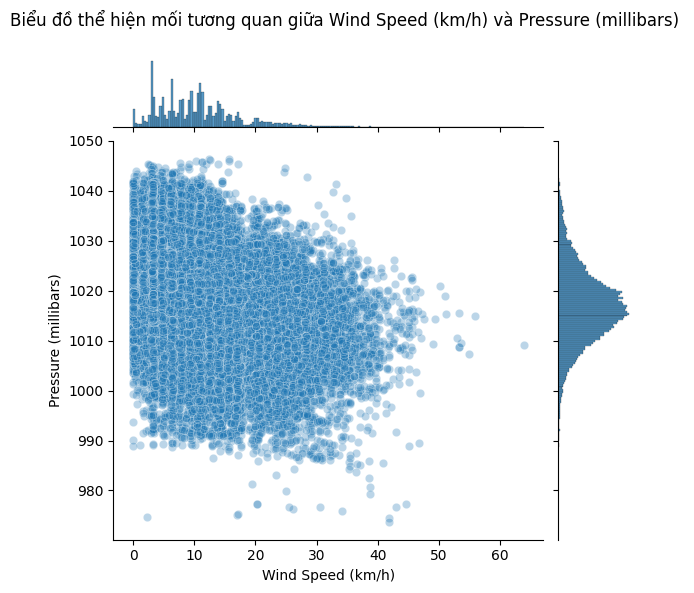

In [158]:
df_plot = df.reset_index(drop=True)

f = sns.jointplot(data=df_plot, x='Wind Speed (km/h)', y='Pressure (millibars)', alpha=0.3)
f.fig.suptitle("Biểu đồ thể hiện mối tương quan giữa Wind Speed (km/h) và Pressure (millibars) ")
f.fig.subplots_adjust(top = 0.9)
plt.savefig('../charts/corr_speed_press.png')

# What is the correlation between Pressure and Visibility?


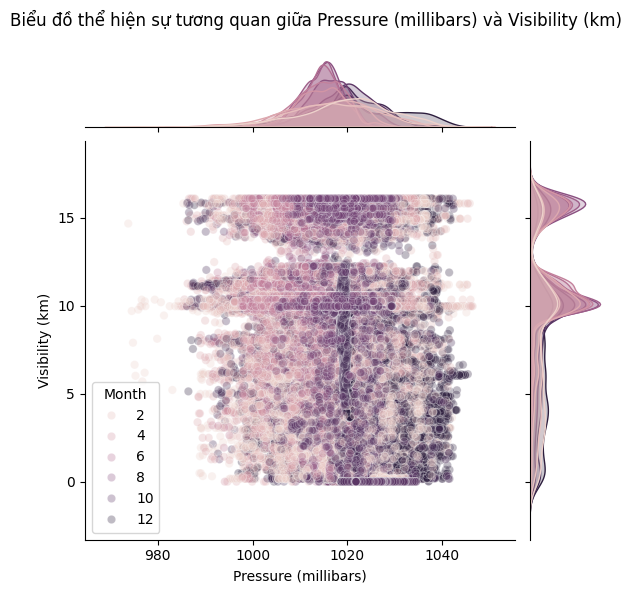

In [159]:
df_plot = df.reset_index(drop=True)

g = sns.jointplot(data = df_plot, x = 'Pressure (millibars)', y = 'Visibility (km)', hue = 'Month', alpha = 0.3)
g.fig.suptitle("Biểu đồ thể hiện sự tương quan giữa Pressure (millibars) và Visibility (km) ")
g.fig.subplots_adjust(top = 0.9)
plt.savefig('../charts/corr_press_vi.png')

# What is the correlation between Temperature and Wind Speed?

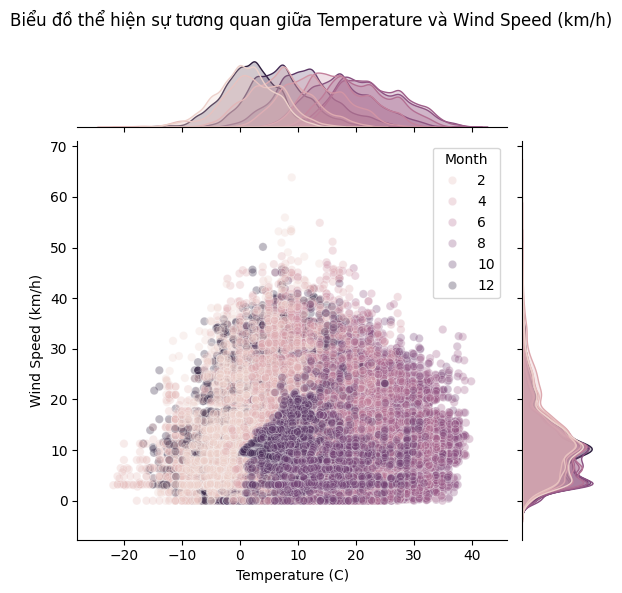

In [160]:
h = sns.jointplot(data = df, x = 'Temperature (C)', y = 'Wind Speed (km/h)', hue = 'Month', alpha = 0.3)
h.fig.suptitle("Biểu đồ thể hiện sự tương quan giữa Temperature và Wind Speed (km/h)")
h.fig.subplots_adjust(top = 0.9)
plt.savefig('../charts/corr_tem_speed.png')

# What is the correlation between the difference (Temperature - Apparent Temperature) and Wind Speed? (To check the 'wind chill' factor).

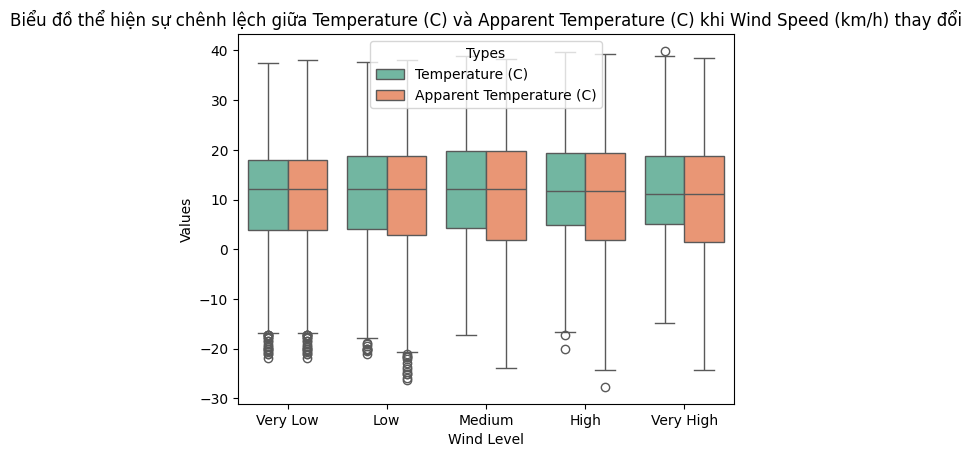

In [161]:
df['Wind Level'] = pd.qcut(
    df['Wind Speed (km/h)'],
    q=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

df_wind_tem_tempa = df.melt(id_vars = ['Wind Level'], value_vars = ['Temperature (C)', 'Apparent Temperature (C)'], var_name= 'Types', value_name = 'Values')

sns.boxplot(data = df_wind_tem_tempa, x = 'Wind Level', y = 'Values', hue = 'Types', palette = 'Set2')
plt.title("Biểu đồ thể hiện sự chênh lệch giữa Temperature (C) và Apparent Temperature (C) khi Wind Speed (km/h) thay đổi")
plt.savefig('../charts/corr_tem_tempa_wind.png')

# What is the correlation between the difference (Temperature - Apparent Temperature) and Humidity? (To check the 'heat index' factor).

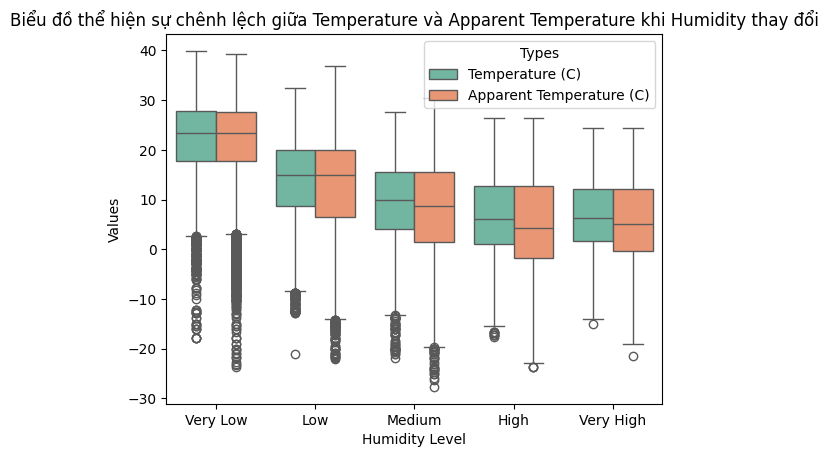

In [162]:
df['Humidity Level'] = pd.qcut(
    df['Humidity'],
    q=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

df_wind_tem_tempa = df.melt(id_vars = ['Humidity Level'], value_vars = ['Temperature (C)', 'Apparent Temperature (C)'], var_name= 'Types', value_name = 'Values')

sns.boxplot(data = df_wind_tem_tempa, x = 'Humidity Level', y = 'Values', hue = 'Types', palette = 'Set2')
plt.title('Biểu đồ thể hiện sự chênh lệch giữa Temperature và Apparent Temperature khi Humidity thay đổi')
plt.savefig('../charts/corr_tem_tempa_hud.png')

### common summary

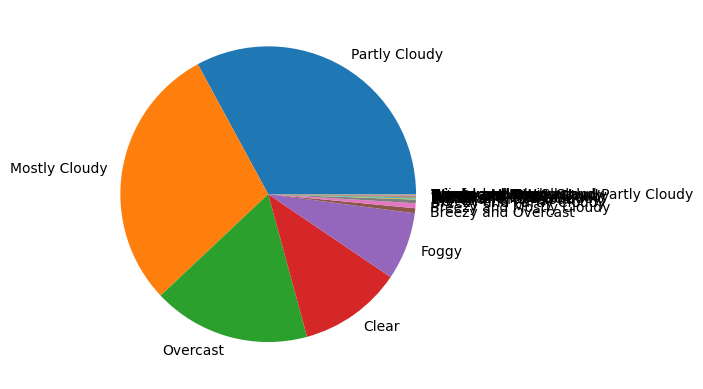

In [163]:
#sửa thêm cho cái đống bùi nhùi kia = 'Khác'

summary_common = df['Summary'].value_counts()
plt.pie(summary_common.values, labels = summary_common.index);

### nhiệt độ trung bình qua các tháng khi trời foggy và clear

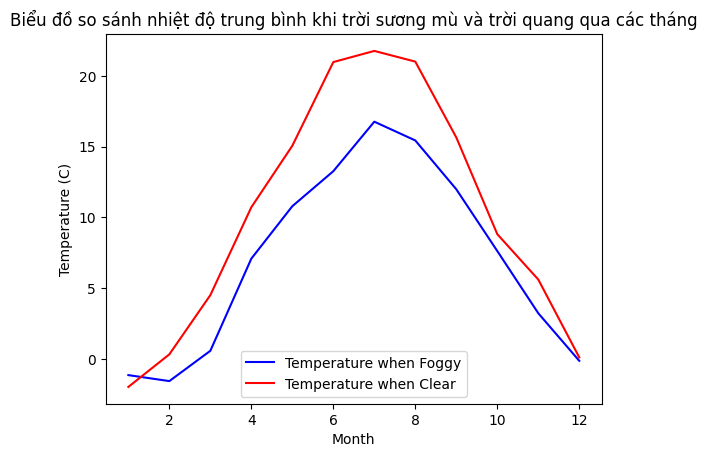

In [164]:
foggy = df[df['Summary'] == 'Foggy']
foggy_tem_avg = foggy.groupby('Month')[['Temperature (C)']].mean()

clear = df[df['Summary'] == 'Clear']
clear_tem_avg = clear.groupby('Month')[['Temperature (C)']].mean()


plt.plot(foggy_tem_avg.index, foggy_tem_avg, 'b', label='Temperature when Foggy')
plt.plot(clear_tem_avg.index, clear_tem_avg, 'r', label='Temperature when Clear')

plt.title('Biểu đồ so sánh nhiệt độ trung bình khi trời sương mù và trời quang qua các tháng')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')

plt.legend()
plt.savefig('../charts/foggy_and_clear.png')


### nhiệt độ khi trời mưa, tuyết, none

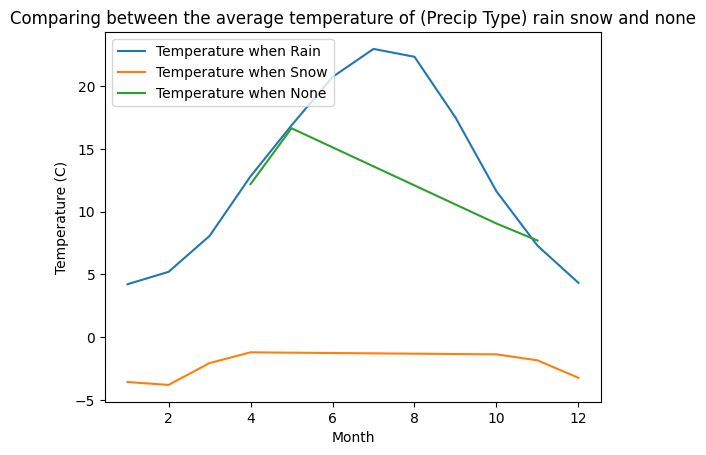

In [165]:
rain = df[df["Precip Type"] == 'rain']
rain_tem_avg = rain.groupby('Month')[['Temperature (C)']].mean()

snow = df[df['Precip Type'] == 'snow']
snow_tem_avg = snow.groupby('Month')[['Temperature (C)']].mean()

none_precip = df[df['Precip Type'] == 'none']
none_tem_avg = none_precip.groupby('Month')[['Temperature (C)']].mean()

plt.plot(rain_tem_avg.index, rain_tem_avg, label = 'Temperature when Rain')
plt.plot(snow_tem_avg.index, snow_tem_avg, label = 'Temperature when Snow')
plt.plot(none_tem_avg.index, none_tem_avg, label = 'Temperature when None')
plt.title('Comparing between the average temperature of (Precip Type) rain snow and none')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.legend()
plt.savefig('../charts/rain_snow_none.png')

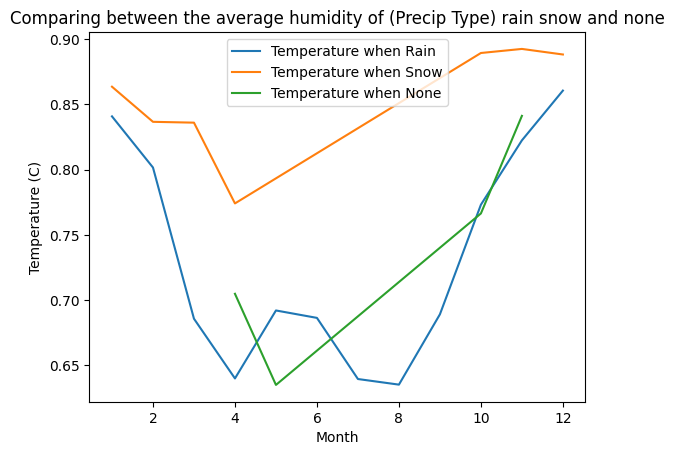

In [166]:
#Comparing between the average humidity of (Precip Type) rain snow and none

rain_humid = df[df["Precip Type"] == 'rain']
rain_humid_avg = rain_humid.groupby('Month')[['Humidity']].mean()

snow_humid = df[df['Precip Type'] == 'snow']
snow_humid_avg = snow_humid.groupby('Month')[['Humidity']].mean()

none_precip_humid = df[df['Precip Type'] == 'none']
none_humid_avg = none_precip_humid.groupby('Month')[['Humidity']].mean()

plt.plot(rain_humid_avg.index, rain_humid_avg, label = 'Temperature when Rain')
plt.plot(snow_humid_avg.index, snow_humid_avg, label = 'Temperature when Snow')
plt.plot(none_humid_avg.index, none_humid_avg, label = 'Temperature when None')
plt.title('Comparing between the average humidity of (Precip Type) rain snow and none')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.legend()

plt.savefig('../charts/humid_rain_snow_none.png')

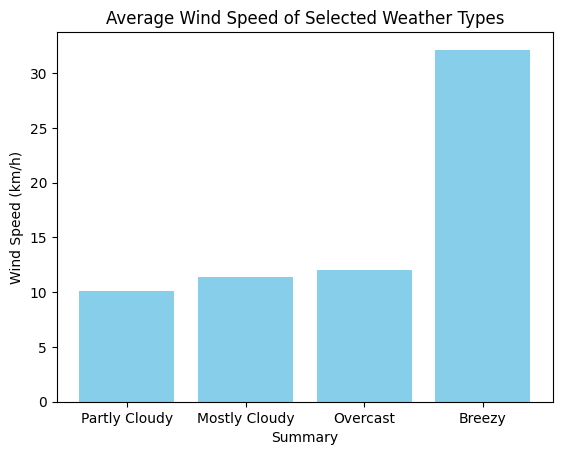

<Figure size 640x480 with 0 Axes>

In [167]:
#Comparing between the average wind speed of (sumary) Breezy and Mostly Cloudy, Overcast Partly Cloudy
wind_by_summary = df.groupby('Summary')['Wind Speed (km/h)'].mean().sort_values()
selected = ['Breezy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy']
wind_selected = wind_by_summary[wind_by_summary.index.isin(selected)]

plt.bar(wind_selected.index, wind_selected.values, color='skyblue')

plt.title('Average Wind Speed of Selected Weather Types')
plt.xlabel('Summary')
plt.ylabel('Wind Speed (km/h)')

plt.show()

plt.savefig('../charts/windspeed_summary.png')


# Extremes Analysis

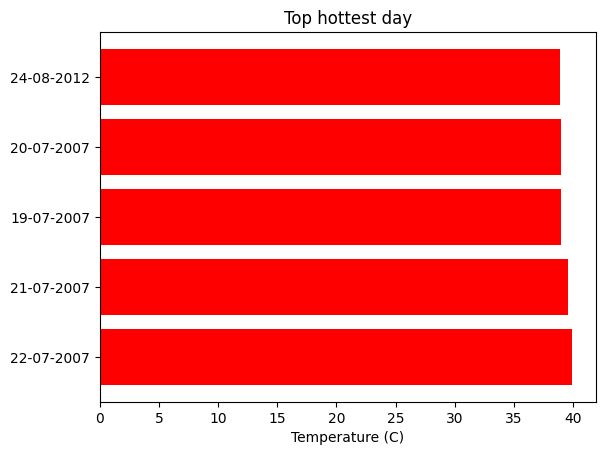

In [168]:
# Top hottest days
top_hotest = df.sort_values(by='Temperature (C)', ascending=False).head(10)
# chuyển index datetime thành chuỗi 
date = top_hotest.index.strftime('%d-%m-%Y')

plt.barh(date, top_hotest['Temperature (C)'], color = 'red')
plt.title('Top hottest day')
plt.xlabel('Temperature (C)')

plt.savefig('../charts/hotest_day.png')

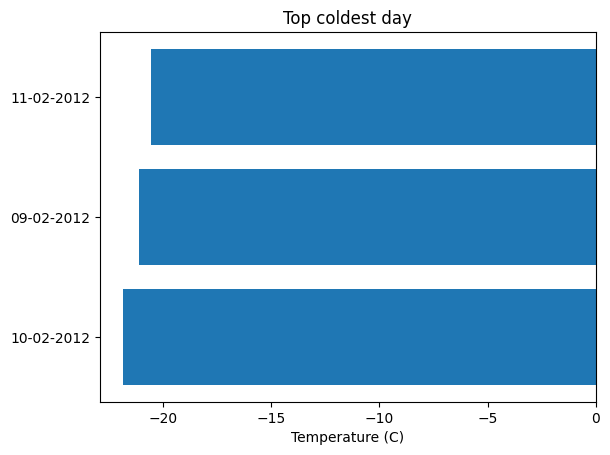

In [169]:
# Top ten coldest days
top_coldest = df.sort_values(by='Temperature (C)', ascending=True).head(10)
date = top_coldest.index.strftime('%d-%m-%Y')
plt.barh(date, top_coldest['Temperature (C)'])
plt.title('Top coldest day')
plt.xlabel('Temperature (C)')
plt.savefig('../charts/coldest_day.png')